In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
# wellbeing.csv containts the self reported data of two participants
df = pd.read_csv('data/wellbeing.csv')

# worktime_jeelka.csv and worktime_luca.csv contain the worktime data of the two participants
df_wt_0 = pd.read_csv('data/worktime_jeelka.csv')
df_wt_1 = pd.read_csv('data/worktime_luca.csv')

# drop User column because we user_id from wellbeing.csv later
df_wt_0.drop(columns=['User'], inplace=True)

# drop time (h) because we use time decimal
df_wt_0.drop(columns=['Time (h)'], inplace=True)
df_wt_1.drop(columns=['Time (h)'], inplace=True)

# Rename Date column to match date from wellbeing.csv
df_wt_0.rename(columns={'Date': 'date'}, inplace=True)
df_wt_1.rename(columns={'Date': 'date'}, inplace=True)

# convert all to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=False)
df_wt_0['date'] = pd.to_datetime(df_wt_0['date'], dayfirst=True)
df_wt_1['date'] = pd.to_datetime(df_wt_1['date'], dayfirst=True)

# convert uuid user_ids to binary (two people in this data set)
df['user_id'] = df['user_id'].apply(lambda x: 0 if x in "e0e084c5-2308-4080-b217-90d5875fa312" else 1)
df_0 = df[df['user_id'] == 0]
df_1 = df[df['user_id'] == 1]

df_0 = df_0.merge(df_wt_0, on='date')
df_1 = df_1.merge(df_wt_1, on='date')

df_1

,date,user_id,wellbeing,meditated,sleep_time,did_sport,steps,sweets,walk,Time (decimal),Amount (EUR)
0,2024-12-21,1,6,False,8.5,False,11000,NaN,NaN,7.30,1.48
1,2024-12-22,1,7,True,8.0,True,7000,NaN,NaN,2.03,NaN
2,2024-12-27,1,6,True,9.0,False,8700,True,True,3.42,NaN
3,2024-12-23,1,6,True,8.0,False,17000,NaN,NaN,3.96,NaN
4,2024-12-25,1,6,True,8.0,False,14000,True,True,5.02,NaN
5,2024-12-26,1,6,True,7.0,False,9500,True,True,1.81,NaN
6,2024-12-30,1,6,True,7.5,False,6000,True,True,0.39,6.88
7,2024-12-28,1,7,False,8.0,False,11000,True,True,2.53,NaN
8,2024-12-29,1,6,True,7.5,True,2000,True,False,0.38,6.66
9,2024-12-31,1,7,True,7.5,False,23000,True,True,2.95,49.46


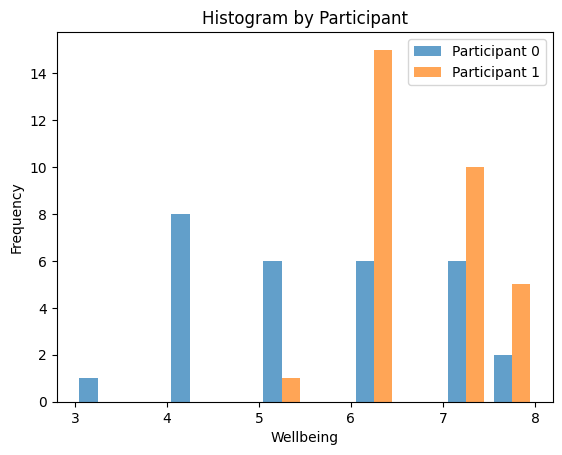

In [21]:
# Simple histogram to a felling for the wellbeing of each participant
plt.hist([df_0['wellbeing'], df_1['wellbeing']], bins=10, alpha=0.7, label=['Participant 0', 'Participant 1'])
plt.xlabel('Wellbeing')
plt.ylabel('Frequency')
plt.title('Histogram by Participant')
plt.legend()
plt.show()